Final
-------------

Iryna Butsky 
03/11/2016


I chose to import the Fermi LAT 4-year Point Source Catalog (from this site: http://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/) for my final project. The data was in a fits file, which I imported into a local lsd database. At the end, I included a plot of the integral photon flux from 1 to 100 GeV of the point sources.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.table import Table
from lsd import DB # database class
import os
from matplotlib.colors import LogNorm
from astropy.io import fits

In [195]:
os.environ['NWORKERS'] = '8' # note: value has to be a string (number of cores we allow it to run on)
os.environ['LSD_CACHEDIR'] = os.environ['HOME'] + '/tempdir' 
os.environ['LSD_TEMPDIR'] = os.environ['HOME'] + '/tempdir'
os.environ['LSD_DB'] = os.environ['HOME'] + '/lsddb'
db = DB(os.environ['LSD_DB'])


In [25]:
# Print out the column names and types
# half automated ;) - had to delete the weird > or | symbols by hand
# also skipped 3 columns that started with a number instead of a letter
yaml_file = open('fermi_new.yaml', 'w')
yaml_file.write('filters: {complevel: 5, complib: blosc}\n')
yaml_file.write('schema:\n')
yaml_file.write('  common:\n')
yaml_file.write('    primary_key: fermi_id\n')
yaml_file.write('    spatial_keys: raj2000, dej2000\n')
yaml_file.write('    columns:\n')
yaml_file.write('    - [fermi_id, u8]')
for column in data.dtype.names:
    yaml_file.write("    - [%s, %s]\n" % (column.lower(), data[column].dtype))


In [205]:
! cat fermi.yaml

filters: {complevel: 5, complib: blosc}
schema:
  common:
    primary_key: fermi_id
    spatial_keys: [raj2000, dej2000]
    columns:
    - [fermi_id, u8]
    - [source_name, S18]
    - [raj2000, f4]
    - [dej2000, f4]
    - [glon, f4]
    - [glat, f4]
    - [conf_68_semimajor, f4]
    - [conf_68_semiminor, f4]
    - [conf_68_posang, f4]
    - [conf_95_semimajor, f4]
    - [conf_95_semiminor, f4]
    - [conf_95_posang, f4]
    - [roi_num, i2]
    - [signif_avg, f4]
    - [pivot_energy, f4]
    - [flux_density, f4]
    - [unc_flux_density, f4]
    - [flux1000, f4]
    - [unc_flux1000, f4]
    - [energy_flux100, f4]
    - [unc_energy_flux100, f4]
    - [signif_curve, f4]
    - [spectrumtype, S16]
    - [spectral_index, f4]
    - [unc_spectral_index, f4]
    - [beta, f4]
    - [unc_beta, f4]
    - [cutoff, f4]
    - [unc_cutoff, f4]
    - [exp_index, f4]
    - [unc_exp_index, f4]
    - [powerlaw_index, f4]
    - [flux30_100, f4]
    - [unc_flux30_100, f4]
    - [nufnu30_100, f4]
    - [s

In [86]:
! lsd-admin create table --schema fermi.yaml fermi --drop-existing

Table 'fermi' dropped.

-------- committing 20160309001157.465800 [fermi] ---------
[fermi] Updating tablet catalog: [256 el.]::::::::::::::::::::>  0.25 sec
[fermi] Updating neighbors: Already up to date.
[fermi] Updating tablet catalog: [256 el.]::::::::::::::::::::>  0.22 sec
[fermi] Updating stats: [0 el.]>  0.00 sec
[fermi] Marking tablets read-only...
----------- success 20160309001157.465800 [fermi] ---------

Table 'fermi' created.


In [87]:
! lsd-import fits fermi gll_psc_v16.fit

Importing from 1 pieces:
  ===> Imported gll_psc_v16.fit                                                        [1/1, 100.00%] +   3034/3034         3034 (2/2 min.)
done

-------- committing 20160309001203.137141 [fermi] ---------
[fermi] Updating tablet catalog: [256 el.]::::::::::::::::::::>  9.26 sec
[fermi] Updating neighbors: [1867 el.]::::::::::::::::::::[175 el.]++++++++++++++++++++>  11.60 sec
        Total 184 cached objects in 175 cells
[fermi] Updating tablet catalog: [256 el.]::::::::::::::::::::>  7.33 sec
[fermi] Updating stats: [1932 el.]::::::::::::::::::::>  0.25 sec [1932 el.]::::::::::::::::::::>  9.49 sec
[fermi] Marking tablets read-only...
----------- success 20160309001203.137141 [fermi] ---------



In [202]:
from lsd.join_ops import Query
rows = db.query('select fermi_id, raj2000, dej2000, flux1000 from fermi').fetch()


 [1867 el.]WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 8 cores.
::::::::::::::::::::>  28.82 sec


In [203]:
field1 = Table(rows.as_ndarray())

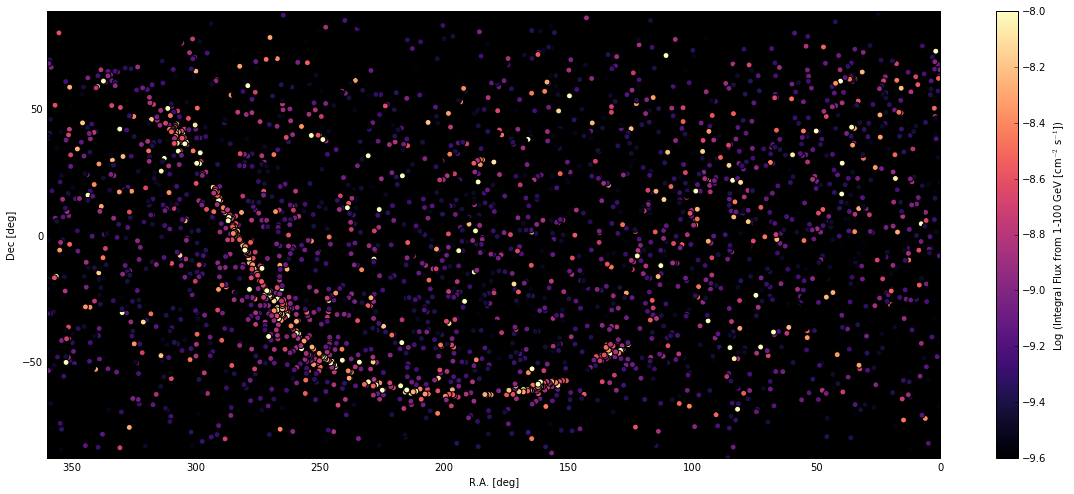

In [204]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_axis_bgcolor('black')
ax.set_xlim(max(field1['raj2000']), 0)
ax.set_ylim(min(field1['dej2000']), max(field1['dej2000']))
cax = ax.scatter(field1['raj2000'], field1['dej2000'], c = np.log10(field1['flux1000']), \
                cmap = plt.get_cmap('magma'), vmin = -9.6, vmax = -8, s = 35)
fig.colorbar(cax, label = 'Log (Integral Flux from 1-100 GeV [cm$^{-2}$ s$^{-1}$])')
ax.set_xlabel('R.A. [deg]')
ax.set_ylabel('Dec [deg]')

In [206]:
! pwd

/astro/users/ibutsky/IrynaButsky/final
